In [24]:
# pandas로 트레이닝 데이터 불러오고 살펴보기

import pandas as pd

df = pd.read_csv('data/train.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [25]:
# 생존여부에 critical하게 영향을 끼칠 것으로 예상되는 요소들

df[['Sex', 'Age', 'SibSp', 'Parch']].head()

,Sex,Age,SibSp,Parch
0,male,22.0,1,0
1,female,38.0,1,0
2,female,26.0,0,0
3,female,35.0,1,0
4,male,35.0,0,0


In [26]:
# Age의 범위 묶어주기 in training set (feature engineering)

df.loc[df['Age'] < 10, 'Age'] = 0
df.loc[(df['Age'] >= 10) &  (df['Age'] < 20), 'Age'] = 1
df.loc[(df['Age'] >= 20) &  (df['Age'] < 30), 'Age'] = 2
df.loc[(df['Age'] >= 30) &  (df['Age'] < 40), 'Age'] = 3
df.loc[(df['Age'] >= 40) &  (df['Age'] < 50), 'Age'] = 4
df.loc[df['Age'] >= 50, 'Age'] = 5

In [27]:
# train의 형재자매수와 부모수를 합치기

df['FamilySize'] = df['SibSp'] + df['Parch']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,3.0,0,0,373450,8.0500,NaN,S,0


In [28]:
# 빈칸 정보 보기

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
FamilySize       0
dtype: int64

In [29]:
# value 요약 보기

df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [30]:
# Embarked의 빈칸을 가장 많이 존재하는 Embarked로 채우기

df['Embarked'] = df['Embarked'].fillna('S')

In [31]:
# 성별을 숫자로 바꿔주기

df.loc[df['Sex'] == 'male', 'Sex'] = 0
df.loc[df['Sex'] == 'female', 'Sex'] = 1

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,NaN,S,0


In [32]:
# embarked 특징의 문자를 숫자로 바꿔주기
# 숫자는 상관 없음

df.loc[df['Embarked'] == 'S', 'Embarked'] = 0
df.loc[df['Embarked'] == 'C', 'Embarked'] = 1
df.loc[df['Embarked'] == 'Q', 'Embarked'] = 2

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,C123,0,1
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,NaN,0,0


<h1>'자율$3' <h1>Cabin의 객실 알파벳만 남기기(첫글자)

In [33]:
# str의 0번째 알파벳만 남기기

df['Cabin'] = df['Cabin'].str[0]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,2.0,1,0,A/5 21171,7.2500,NaN,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",1,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,3.0,1,0,113803,53.1000,C,0,1
4,5,0,3,"Allen, Mr. William Henry",0,3.0,0,0,373450,8.0500,NaN,0,0


In [34]:
df['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [35]:
df['Cabin'] = df['Cabin'].fillna('C')

<h1>'자율$4' <h1>Cabin의 문자값 데이터를 숫자로 변환

In [36]:
df['Cabin'].value_counts()

C    746
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [37]:
df['Cabin'] = df['Cabin'].map({
    'C' : 0,
    'B' : 1,
    'D' : 2,
    'E' : 3,
    'A' : 4,
    'F' : 5,
    'G' : 6,
    'T' : 7   
})

df['Cabin'].value_counts()

0    746
1     47
2     33
3     32
4     15
5     13
6      4
7      1
Name: Cabin, dtype: int64

<h1>'자율$5' <h1>Name에서 유용한 정보 남기기

In [38]:
df[['Name', 'Age']].head()

,Name,Age
0,"Braund, Mr. Owen Harris",2.0
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3.0
2,"Heikkinen, Miss. Laina",2.0
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3.0
4,"Allen, Mr. William Henry",3.0


In [39]:
df.loc[df['Name'].str.contains('Mr\.'), 'Name'] = 'Mr'
df.loc[df['Name'].str.contains('Mrs\.'), 'Name'] = 'Mrs'
df.loc[df['Name'].str.contains('Miss\.'), 'Name'] = 'Miss'
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,Mr,0,2.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,Mrs,1,3.0,1,0,PC 17599,71.2833,0,1,1
2,3,1,3,Miss,1,2.0,0,0,STON/O2. 3101282,7.9250,0,0,0
3,4,1,1,Mrs,1,3.0,1,0,113803,53.1000,0,0,1
4,5,0,3,Mr,0,3.0,0,0,373450,8.0500,0,0,0


In [40]:
df['Name'] = df['Name'].map({
    'Mr':0,
    'Mrs': 1,
    'Miss': 2
})

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0.0,0,2.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,1.0,1,3.0,1,0,PC 17599,71.2833,0,1,1
2,3,1,3,2.0,1,2.0,0,0,STON/O2. 3101282,7.9250,0,0,0
3,4,1,1,1.0,1,3.0,1,0,113803,53.1000,0,0,1
4,5,0,3,0.0,0,3.0,0,0,373450,8.0500,0,0,0


<h1>'자율$6' <h1>Name의 빈칸(NaN)을 3으로 채워 넣기

In [41]:
df['Name'] = df['Name'].fillna(3)

df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0.0,0,2.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,1.0,1,3.0,1,0,PC 17599,71.2833,0,1,1
2,3,1,3,2.0,1,2.0,0,0,STON/O2. 3101282,7.9250,0,0,0
3,4,1,1,1.0,1,3.0,1,0,113803,53.1000,0,0,1
4,5,0,3,0.0,0,3.0,0,0,373450,8.0500,0,0,0
5,6,0,3,0.0,0,NaN,0,0,330877,8.4583,0,2,0
6,7,0,1,0.0,0,5.0,0,0,17463,51.8625,3,0,0
7,8,0,3,3.0,0,0.0,3,1,349909,21.0750,0,0,4
8,9,1,3,1.0,1,2.0,0,2,347742,11.1333,0,0,2
9,10,1,2,1.0,1,1.0,1,0,237736,30.0708,0,1,1


<h1>'자율$7' <h1>수정된 Name과 채워진 Age를 확인합니다.

In [42]:
df['Name'].value_counts()

0.0    517
2.0    182
1.0    125
3.0     67
Name: Name, dtype: int64

In [43]:
df['Age'] = df['Age'].fillna( df.groupby('Name')['Age'].transform('mean') )
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,0.0,0,2.0,1,0,A/5 21171,7.2500,0,0,1
1,2,1,1,1.0,1,3.0,1,0,PC 17599,71.2833,0,1,1
2,3,1,3,2.0,1,2.0,0,0,STON/O2. 3101282,7.9250,0,0,0
3,4,1,1,1.0,1,3.0,1,0,113803,53.1000,0,0,1
4,5,0,3,0.0,0,3.0,0,0,373450,8.0500,0,0,0


In [44]:
import seaborn as sns
sns.set()

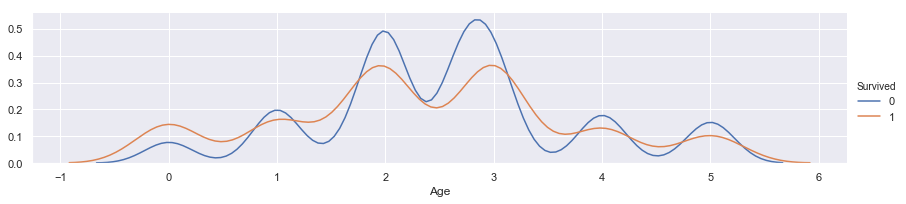

In [45]:
# kdeplot을 사용하여 매끄러운 곡선 분포도 얻기

facet = sns.FacetGrid(df, hue = 'Survived', aspect = 4)
facet.map(sns.kdeplot, 'Age')
facet.add_legend()
